# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import math

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined=study_results.merge(mouse_metadata, on = 'Mouse ID').sort_values(['Timepoint','Tumor Volume (mm3)'])

# Display the data table for preview

combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined[combined.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined[combined['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean=combined[combined['Mouse ID']!='g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

pd.DataFrame({
    'Mean Tumor Volume': grp.mean(),
    'Median Tumor Volume': grp.median(),
    'Tumor Volume Variance': grp.var(),
    'Tumor Volume Std. Dev.': grp.std(),
    'Tumor Volume Std. Err.': grp.sem()

})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_summary = clean.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
clean_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

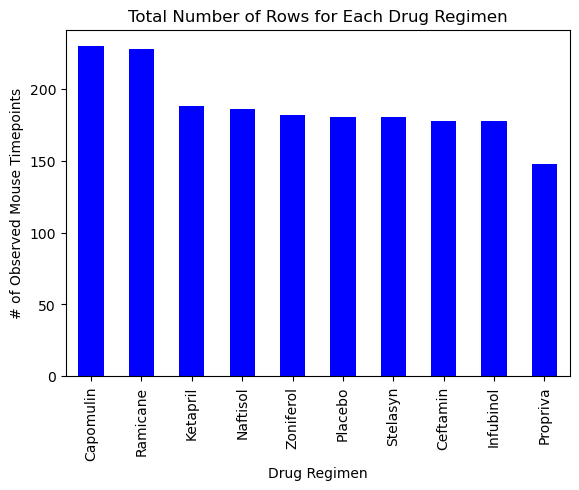

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by the drug regimen and count the number of rows for each group
drug_regimen_counts = clean.groupby('Drug Regimen').size().sort_values(ascending=False)

# Create a bar plot
drug_regimen_counts.plot(kind='bar', color='blue', figsize=(6.5, 4.5))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


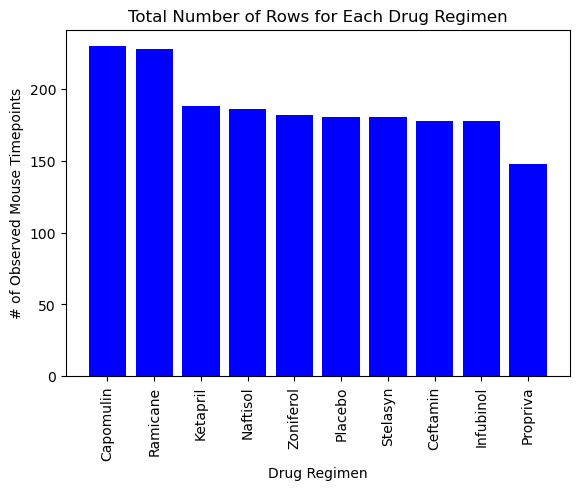

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6.5, 4.5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

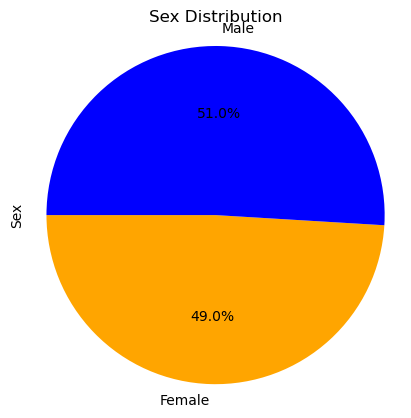

In [11]:
# Calculate the number of females and males
Female_count = clean[clean['Sex'] == 'Female'].shape[0]
Male_count = clean[clean['Sex'] == 'Male'].shape[0]

# Calculate Female and Male percentages
Female_Percentage = (Female_count / (Female_count + Male_count)) * 100
Male_Percentage = 100 - Female_Percentage

# Create a Pandas Series with the data for the pie chart
data = pd.Series([Female_Percentage, Male_Percentage], index=['Female', 'Male'])

# Create a pie plot using Pandas
data.plot.pie(figsize=(4.8, 4.8), autopct='%1.1f%%', startangle=180, colors=['orange', 'blue'])

plt.title('Sex Distribution')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

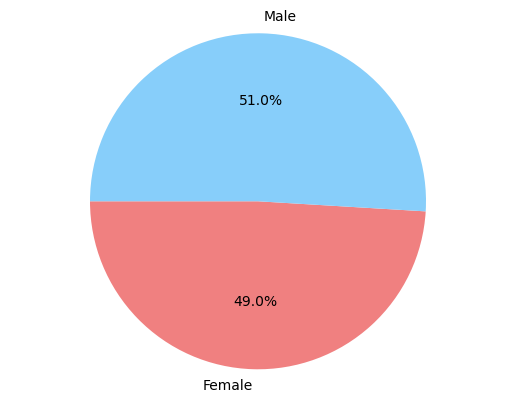

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [Female_Percentage, Male_Percentage]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

grp1 = clean.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tv = pd.merge(grp1, clean, on=['Mouse ID', 'Timepoint'], how='inner')
final_tv = final_tv.set_index('Drug Regimen')
final_tv_filtered = final_tv.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]

final_tv_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,45,38.982878,2,Female,9,22
Capomulin,b742,45,38.939633,0,Male,7,21
Capomulin,f966,20,30.485985,0,Male,16,17
Capomulin,g288,45,37.074024,1,Male,3,19
Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...
Ceftamin,x226,0,45.000000,0,Male,23,28
Ceftamin,x581,45,64.634949,3,Female,19,28
Ceftamin,x822,45,61.386660,3,Male,3,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty lists to fill with tumor vol data (for plotting)
tumor_volume = []
outliers = []


# Loop through each treatment regimen
for treatment in treatments:
    # Get the tumor volume data for the current treatment
    volumes = final_tv_filtered.loc[treatment, 'Tumor Volume (mm3)']
    
    # Convert the list of tumor volumes to a Pandas Series
    volumes_series = pd.Series(volumes)
    
    # Append the tumor volumes to the list
    tumor_volume.append(volumes_series)
    
 # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volumes_series.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    potential_outliers = volumes_series[(volumes_series < lower_bound) | (volumes_series > upper_bound)]




   # Locate the rows which contain mice on each drug and get the tumor volumes
    
    #add subset???????
    ## subset = final_tv_filtered.loc[final_tv_filtered.index == treatment, 'Tumor Volume (mm3)']
   # outliers.append({
       # 'Treatment': treatment,
        #'Lower Bound': lower_bound,
        #'Upper Bound': upper_bound,
        #'Potential Outliers': potential_outliers.tolist(),
        #'Subset': subset.tolist()
    #})
    ## Create a DataFrame to display potential outliers
#outliers_df = pd.DataFrame(outliers)
#outliers_df

    # Append potential outliers to the list
    outliers.append(potential_outliers)
   
    outliers


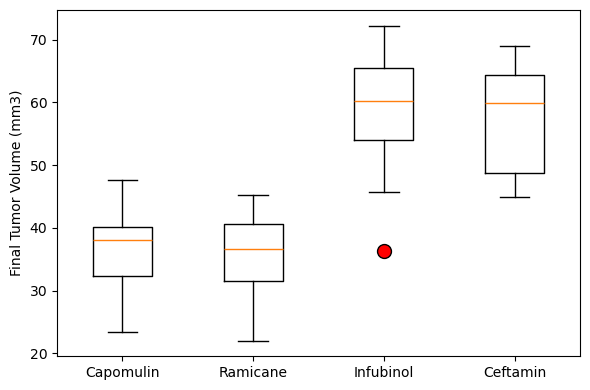

In [15]:
# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_volume, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10, linestyle='None'))

# Set plot labels and title
#plt.title('Tumor Volume for Each Treatment Regimen')
#plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
#plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Line and Scatter Plots

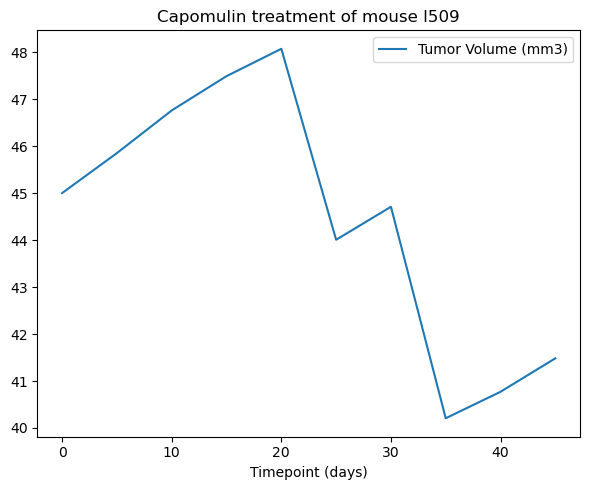

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean.loc[clean['Drug Regimen'] == 'Capomulin']
Mouse_l509_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 'l509']
# Filter the DataFrame down only to the above required columns to chart
tv_and_tp = Mouse_l509_df[["Tumor Volume (mm3)","Timepoint"]]

# Set the index to be "Timepoint" so they will be used as labels
tv_and_tp = tv_and_tp.set_index("Timepoint")

tv_and_tp.head()
# Use DataFrame.plot() in order to create a bar chart of the data

tv_and_tp.plot(kind='line', figsize=(6, 5), xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)', title= 'Capomulin treatment of mouse l509')

# Or
#tv_and_tp.plot(kind="line", figsize=(6,5))
# Set a title for the chart
#plt.title("Capomulin treatment of mouse l509")
#plt.ylabel("Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.tight_layout()
plt.show()


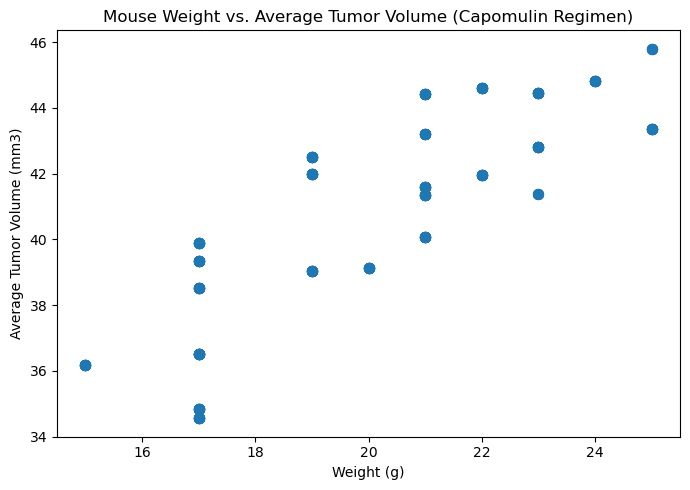

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the mean tumor volume for each mouse ID in the Capomulin regimen
mean_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the mean values with the original DataFrame based on 'Mouse ID'
Capomulin_df = pd.merge(Capomulin_df, mean_tumor_volume, on='Mouse ID', suffixes=('', '_mean'))

# Plot the scatter plot
Capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)_mean", figsize=(6, 4.5), title="Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)", s=50)

#Using plt. for the plot
#plt.figure(figsize=(8, 4))
#plt.scatter(Capomulin_df["Weight (g)"], Capomulin_df["Tumor Volume (mm3)_mean"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
#plt.xlabel("Weight (g)")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


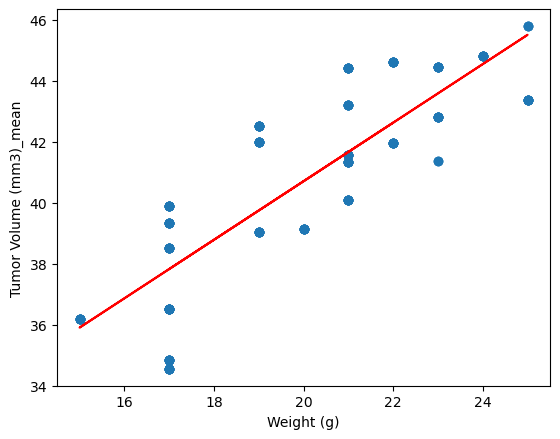

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = Capomulin_df["Weight (g)"].corr(Capomulin_df["Tumor Volume (mm3)_mean"])
correlation_coefficient = round(r_value, 2)

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(Capomulin_df["Weight (g)"], Capomulin_df["Tumor Volume (mm3)_mean"])

#Print the correlation coefficient and linear regression equation statement first since the output shows this statement on top of the figure. 
print("The correlation between mouse weight and the average tumor volume is", (correlation_coefficient))

# Plot the scatter plot
Capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)_mean", figsize=(5.7, 4.5), s=35)

# Plot the linear regression line
plt.plot(Capomulin_df["Weight (g)"], predicted_tumor_volume, color="red")

# Show the plot

plt.tight_layout()
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


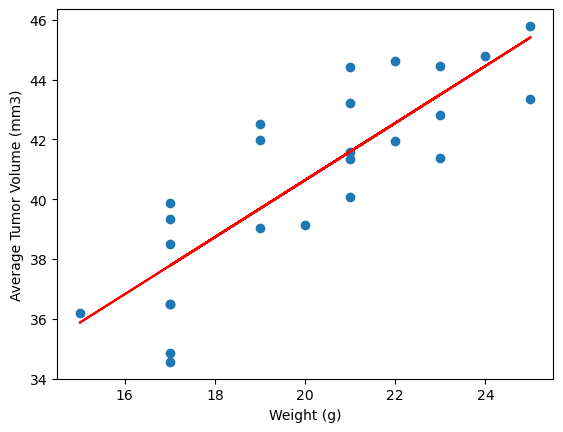

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
